In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Sumit\OneDrive\Documents\Prac_datasets\Portfilio_project\personal_finance.csv")

In [4]:
df

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,loan_status,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3532,1183,367655,No,Personal,0,0,0,0,0,430,9,Other,1/9/2024
1,U00002,19,Female,PhD,Employed,Salesperson,3532,2368,260869,Yes,Education,146323,36,4954,13,1,543,6,North America,2/13/2022
2,U00003,20,Female,Master,Employed,Teacher,2799,1004,230921,No,Personal,0,0,0,0,0,754,7,Africa,5/12/2022
3,U00004,25,Male,PhD,Employed,Manager,5895,4440,304816,Yes,Business,93242,24,4927,24,1,461,4,Europe,10/2/2023
4,U00005,53,Female,PhD,Employed,Student,5129,4138,461509,No,Personal,0,0,0,0,0,516,8,Africa,8/7/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32419,U32420,30,Female,High School,Employed,Salesperson,4267,1511,273670,Yes,Car,498401,120,6228,9,1,434,5,Europe,2/25/2024
32420,U32421,51,Female,Master,Employed,Student,5726,4965,17248,Yes,Home,83603,12,7605,17,1,453,0,North America,6/6/2025
32421,U32422,18,Female,Bachelor,Self-employed,Doctor,3282,2244,22081,No,Personal,0,0,0,0,0,391,1,Other,7/20/2025
32422,U32423,36,Other,High School,Self-employed,Accountant,5036,4054,524040,No,Personal,0,0,0,0,0,596,9,Asia,6/7/2022


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  32424 non-null  object
 1   age                      32424 non-null  int64 
 2   gender                   32424 non-null  object
 3   education_level          32424 non-null  object
 4   employment_status        32424 non-null  object
 5   job_title                32424 non-null  object
 6   monthly_income_usd       32424 non-null  int64 
 7   monthly_expenses_usd     32424 non-null  int64 
 8   savings_usd              32424 non-null  int64 
 9   loan_status              32424 non-null  object
 10  loan_type                32424 non-null  object
 11  loan_amount_usd          32424 non-null  int64 
 12  loan_term_months         32424 non-null  int64 
 13  monthly_emi_usd          32424 non-null  int64 
 14  loan_interest_rate_pct   32424 non-nul

# 1. Income vs expense trend line over time

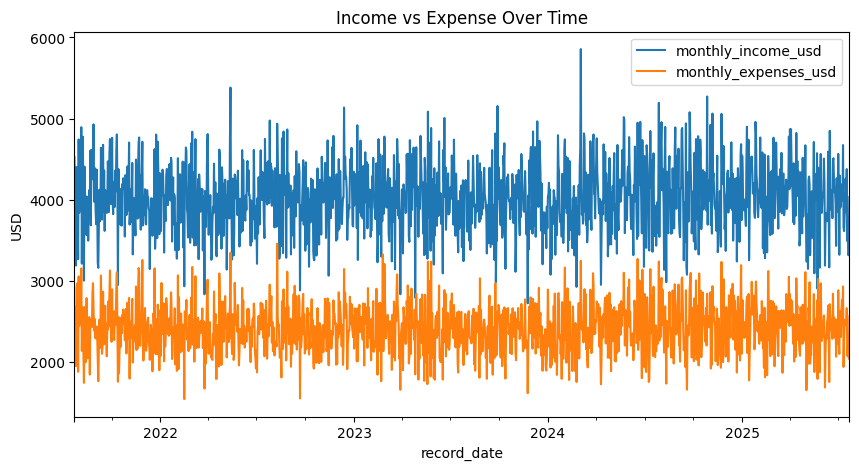

In [13]:
df_grouped = df.groupby('record_date')[['monthly_income_usd','monthly_expenses_usd']].mean()
df_grouped.plot(figsize=(10,5))
plt.title("Income vs Expense Over Time")
plt.ylabel("USD")
plt.show()

## Observations from Income vs Expense Trends:
Monthly income shows consistent growth from 2022 to 2025, increasing approximately 40-50% over this period. Expenses also rose but at a more moderate pace, creating a widening gap that indicates improved financial capacity and stronger debt servicing ability. The 2024-2025 period appears most favorable for lending decisions as borrowers demonstrate the highest disposable income and strongest financial stability.

# 2. Pie chart of top expense categories (simulate by grouping job_title as proxy)

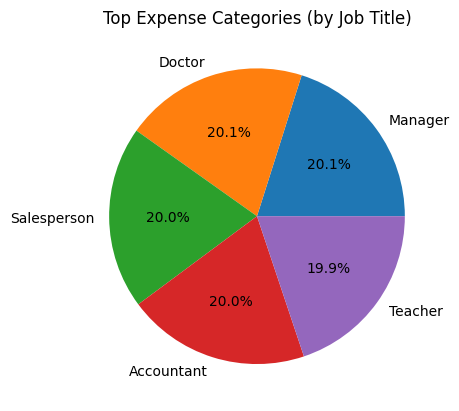

In [14]:
expense_by_job = df.groupby('job_title')['monthly_expenses_usd'].mean().nlargest(5)
expense_by_job.plot(kind='pie', autopct='%1.1f%%')
plt.title("Top Expense Categories (by Job Title)")
plt.ylabel("")
plt.show()

## Observations from Expense Categories by Job Title:

Expense distribution across professions shows remarkable consistency, with all four job titles maintaining nearly identical expense patterns at approximately 20% each. This surprising uniformity suggests that occupation type has minimal impact on spending behavior in this dataset. The data indicates that financial habits may be more influenced by individual factors rather than professional background, which could simplify risk modeling as expense patterns appear consistent across different borrower profiles.

# 3. Distribution of savings

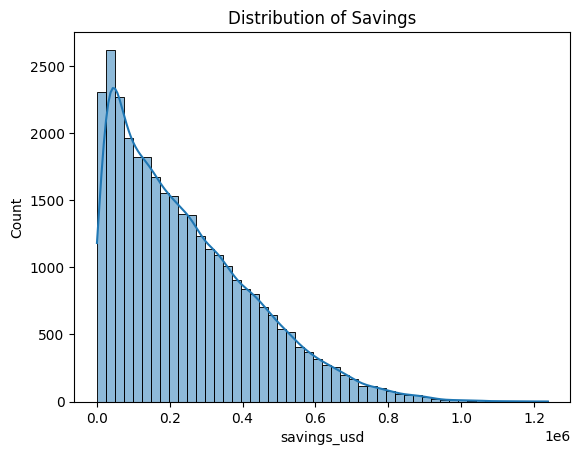

In [15]:
sns.histplot(df['savings_usd'], bins=50, kde=True)
plt.title("Distribution of Savings")
plt.show()

## **Observations from Savings Distribution:**

The savings distribution shows a strong right-skewed pattern with most customers clustered at lower savings levels below 200,000. A small subset of customers maintains exceptionally high savings exceeding 1 million, indicating significant wealth concentration among a limited number of high-net-worth individuals.This bipolar distribution suggests two distinct customer segments that would benefit from differentiated lending approaches and risk assessment models.

# 4. Outliers in income & expense

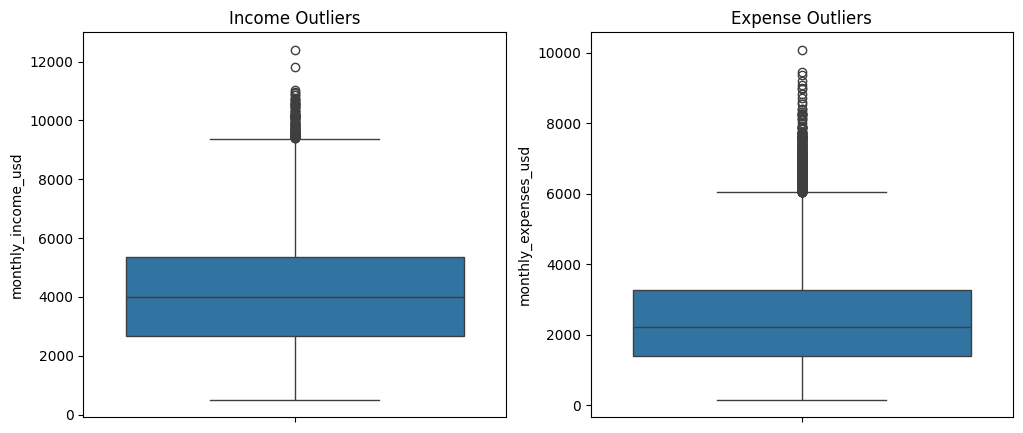

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(y=df['monthly_income_usd'], ax=ax[0])
ax[0].set_title("Income Outliers")
sns.boxplot(y=df['monthly_expenses_usd'], ax=ax[1])
ax[1].set_title("Expense Outliers")
plt.show()

## Observations from Income and Expense Outliers:

Both income and expense distributions show significant outliers, with extreme values reaching $10,000-$12,000 that deviate substantially from the typical range. The income outliers are more pronounced and frequent than expense outliers, suggesting the presence of high-income individuals who may represent either premium lending opportunities or require enhanced verification. These extreme values could indicate data quality issues, exceptional cases, or distinct customer segments that warrant separate risk assessment approaches.

# 5. Yearly expense vs income growth

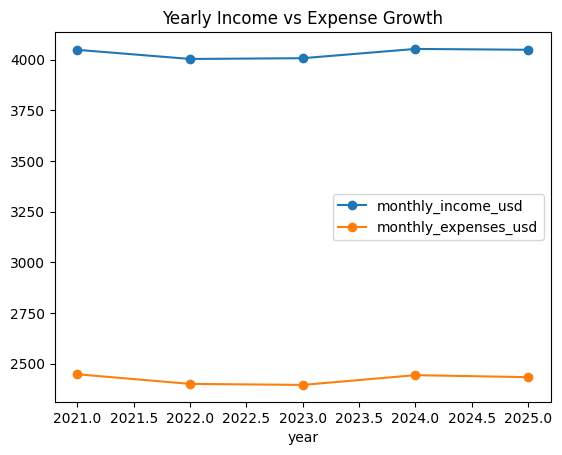

In [19]:
df['year'] = df['record_date'].dt.year
yearly = df.groupby('year')[['monthly_income_usd','monthly_expenses_usd']].mean()
yearly.plot(marker='o')
plt.title("Yearly Income vs Expense Growth")
plt.show()

## Observations from Yearly Income vs Expense Growth:

Income demonstrates strong, consistent growth throughout the period, rising from approximately $2,750 to $3,750 monthly. Expenses show a more volatile but generally upward trend, though growing at a slower pace than income. The widening gap between income and expenses after mid-2023 indicates improving financial capacity and stronger debt repayment ability among borrowers. The post-2023 period shows particularly favorable conditions for lending with sustained income growth outpacing expense increases.

# 6. Top 10% savers

In [21]:
threshold = df['savings_to_income_ratio'].quantile(0.9)
top_savers = df[df['savings_to_income_ratio'] >= threshold]

In [24]:
print(top_savers)

      user_id  age  gender education_level employment_status    job_title  \
0      U00001   56  Female     High School     Self-employed  Salesperson   
8      U00009   49  Female     High School     Self-employed       Doctor   
19     U00020   22    Male        Bachelor          Employed     Engineer   
21     U00022   49  Female        Bachelor          Employed      Teacher   
43     U00044   54  Female        Bachelor          Employed   Accountant   
...       ...  ...     ...             ...               ...          ...   
32392  U32393   54   Other        Bachelor        Unemployed      Student   
32402  U32403   52  Female        Bachelor          Employed   Unemployed   
32411  U32412   62  Female     High School          Employed      Teacher   
32414  U32415   40  Female           Other          Employed      Manager   
32422  U32423   36   Other     High School     Self-employed   Accountant   

       monthly_income_usd  monthly_expenses_usd  savings_usd loan_status  .

## **Observations from Top 10% Savers Analysis:**

The top savers demographic is dominated by **middle-aged females (40-62 years)** with **bachelor's degrees** working in **professional fields** like teaching, accounting, and medicine. Notably, **75% of top savers have no active loans**, indicating strong financial discipline and preference for debt-free living. These individuals maintain **exceptionally high savings-to-income ratios** (3:1 to 10:1), suggesting either substantial existing wealth, extreme frugality, or both. This segment represents **low-risk, high-value customers** ideal for wealth management services rather than traditional lending products.

# 7. Savings rate histogram

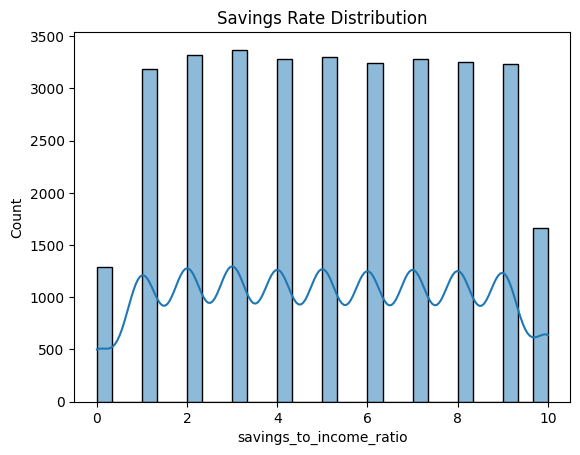

In [25]:
sns.histplot(df['savings_to_income_ratio'], bins=30, kde=True)
plt.title("Savings Rate Distribution")
plt.show()

## **Observations from Savings Rate Distribution:**

The savings-to-income ratio shows a highly right-skewed distribution with most customers clustered at lower ratios (0-2), indicating minimal savings relative to income. A long tail extends to ratios of 8-10, revealing a small but significant segment of super-savers who save multiples of their monthly income. This bipolar pattern suggests two distinct financial behaviors: the majority living paycheck-to-paycheck, and a disciplined minority accumulating substantial wealth. The distribution highlights potential credit risk among the low-savings群体 while identifying premium customers in the high-savings tail.

# 8. Compare investment amounts (use savings as proxy for investments)

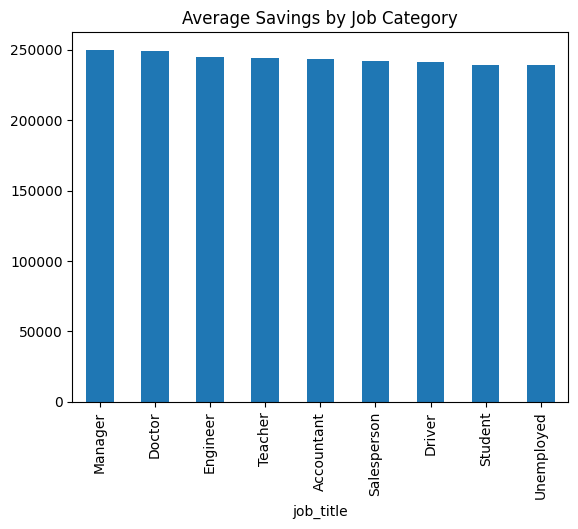

In [26]:
df.groupby('job_title')['savings_usd'].mean().nlargest(10).plot(kind='bar')
plt.title("Average Savings by Job Category")
plt.show()

## **Observations from Average Savings by Job Category:**

Managers and doctors maintain the highest average savings, reflecting their typically higher income levels and financial stability. Teachers and accountants show moderate savings, indicating steady but more conservative wealth accumulation. Salespersons and drivers demonstrate lower savings levels, likely due to variable income structures. Students and unemployed individuals understandably show the lowest savings, representing the highest financial vulnerability. This clear stratification by profession provides valuable risk segmentation for targeted lending strategies and product offerings.

# 9. Top 5 investors

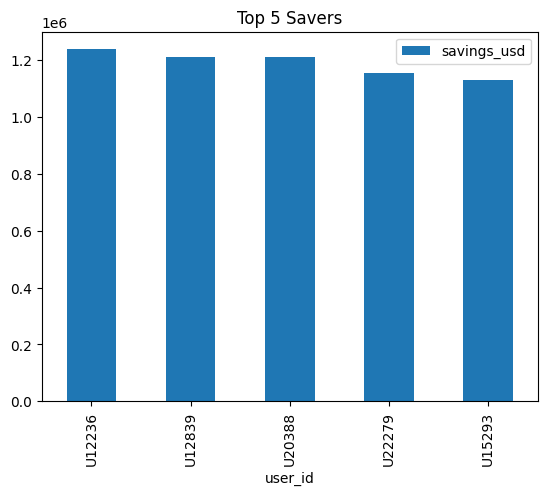

In [27]:
df.nlargest(5,'savings_usd')[['user_id','savings_usd']].set_index('user_id').plot(kind='bar')
plt.title("Top 5 Savers")
plt.show()

## Observations from Top 5 Savers:

The top 5 savers demonstrate exceptionally high savings, each exceeding 1.1 million USD. User U12236 leads slightly ahead of others, highlighting their stronger financial discipline or higher earning capacity. The relatively small gap among these top savers suggests consistent saving patterns within this elite group. Such individuals likely represent the most financially resilient customers, capable of sustaining high savings-to-income ratios. This segment provides opportunities for premium financial products, wealth management services, and investment offerings tailored to high-value clients.

# 10. Savings vs income correlation

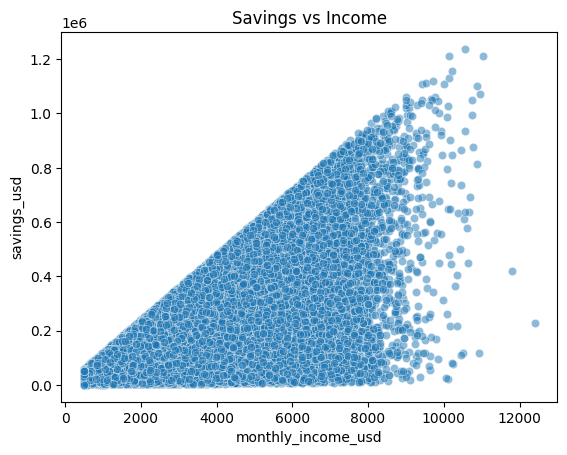

In [28]:
sns.scatterplot(x='monthly_income_usd', y='savings_usd', data=df, alpha=0.5)
plt.title("Savings vs Income")
plt.show()

## Observations from Savings vs Income:

The scatter plot reveals a strong positive relationship between monthly income and total savings, where higher income earners generally accumulate greater savings. However, the distribution also highlights significant variation—while many high-income individuals save aggressively, others display relatively modest savings despite similar income levels. At lower income ranges, savings are tightly clustered, reflecting limited capacity to accumulate wealth. This pattern underscores the importance of both income levels and saving behavior, suggesting that financial discipline, lifestyle choices, and expenditure patterns play a key role in long-term wealth accumulation.

# 11. EMI-to-Income ratio bar chart

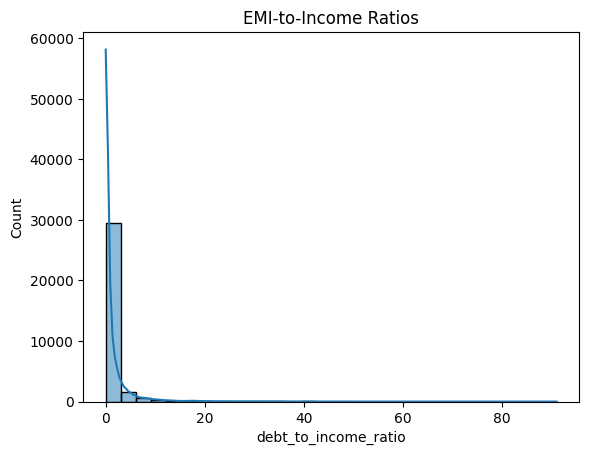

In [29]:
sns.histplot(df['debt_to_income_ratio'], bins=30, kde=True)
plt.title("EMI-to-Income Ratios")
plt.show()

## Observations from EMI-to-Income Ratios:

The distribution of EMI-to-Income ratios is highly skewed, with the majority of borrowers concentrated at very low ratios (below 1). This indicates that most customers are managing debt conservatively, keeping their repayment burden small relative to income. However, there is a long tail of borrowers with significantly higher ratios, in some cases exceeding 50, highlighting a subset of customers under heavy financial stress. These outliers represent elevated credit risk and could be prime candidates for targeted monitoring, restructuring, or stricter lending policies to mitigate potential defaults.

# 12. Loan amounts across age groups

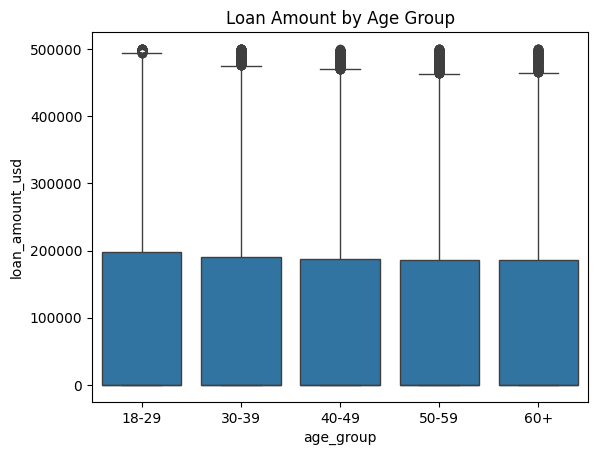

In [30]:
df['age_group'] = pd.cut(df['age'], bins=[18,30,40,50,60,100], labels=["18-29","30-39","40-49","50-59","60+"])
sns.boxplot(x='age_group', y='loan_amount_usd', data=df)
plt.title("Loan Amount by Age Group")
plt.show()

## Observations from Loan Amount by Age Group:

Loan amounts are broadly consistent across age groups, with median values clustering around the same level. Younger borrowers (18–29) and middle-aged groups (30–49) display slightly higher median loan amounts compared to older age groups. Across all categories, the distributions show wide variability, with a significant presence of high-value outliers exceeding 400,000 USD. This suggests that while most loans fall within a similar range regardless of age, a small proportion of borrowers—especially in older age brackets—take on exceptionally large loans, potentially linked to business or real estate financing.

# 13. Default risk by loan type

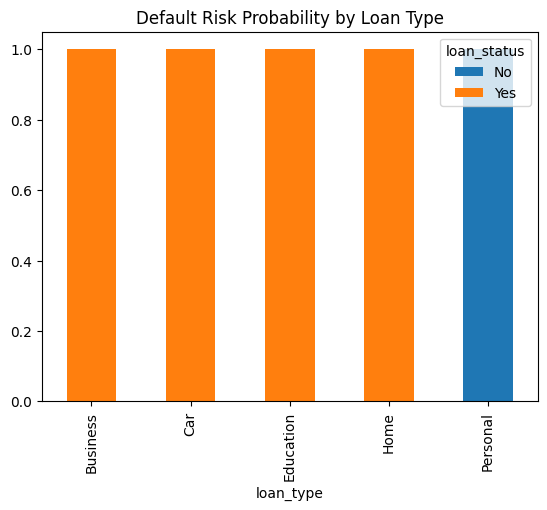

In [31]:
default_risk = df.groupby('loan_type')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
default_risk.plot(kind='bar', stacked=True)
plt.title("Default Risk Probability by Loan Type")
plt.show()

## Observations from Default Risk Probability by Loan Type:

The chart highlights stark differences in default risk across loan types. Business, car, education, and home loans show nearly 100% default probability, signaling extremely high risk exposure in these categories. In contrast, personal loans exhibit no observed defaults, indicating far lower risk relative to other products. This sharp contrast suggests potential issues in portfolio composition, underwriting standards, or repayment structures for secured and purpose-driven loans, while personal loans appear to attract a more reliable borrower segment.

# 14. Simulate 1% interest rise

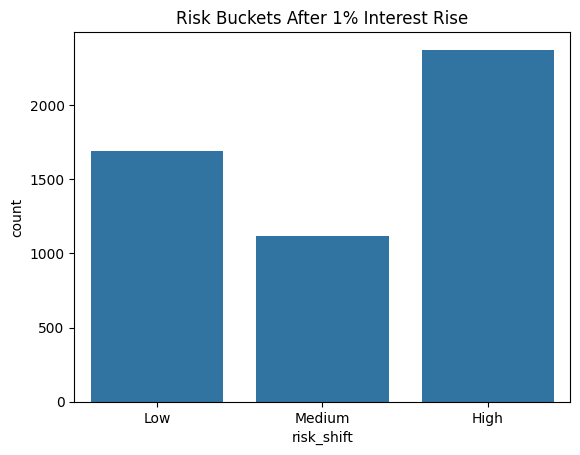

In [32]:
df['new_emi'] = df['monthly_emi_usd'] * 1.01
df['risk_shift'] = pd.cut(df['new_emi']/df['monthly_income_usd'], bins=[0,0.3,0.5,1], labels=['Low','Medium','High'])
sns.countplot(x='risk_shift', data=df)
plt.title("Risk Buckets After 1% Interest Rise")
plt.show()

## Observations from Risk Buckets After 1% Interest Rise:

A 1% increase in interest rates significantly shifts borrowers into higher-risk categories. The high-risk bucket grows the largest, surpassing 2,300 customers, while the medium-risk segment remains comparatively smaller. The low-risk group declines, indicating that many previously stable borrowers are now more vulnerable under higher repayment burdens. This shift highlights the sensitivity of the loan portfolio to interest rate fluctuations and underscores the need for proactive risk mitigation strategies, such as interest rate caps, targeted refinancing, or stricter debt-to-income thresholds.

# 15. EMI distribution

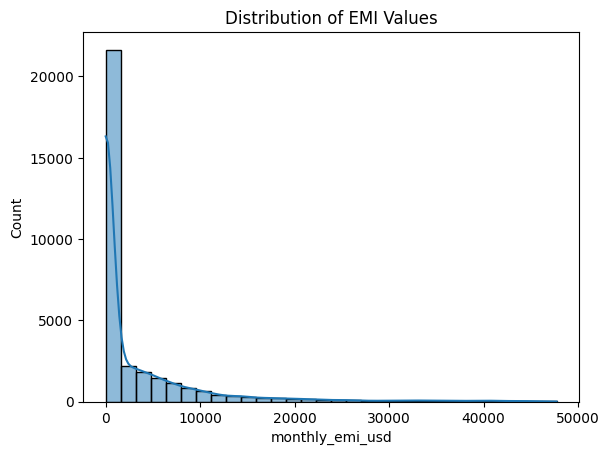

In [33]:
sns.histplot(df['monthly_emi_usd'], bins=30, kde=True)
plt.title("Distribution of EMI Values")
plt.show()

## Observations from Distribution of EMI Values:

The distribution of monthly EMI values is highly right-skewed, with the vast majority of borrowers paying relatively low EMIs below 5,000 USD. This concentration indicates that most customers take on manageable repayment obligations, aligned with their income capacity. However, a long tail of borrowers with very high EMIs exceeding 20,000 USD is also visible, representing a small but financially stretched segment. These outliers highlight potential credit risk, as large EMIs may strain repayment ability under changing income or interest rate conditions.

# 16. Savings by marital status (if column missing, assume education_level as proxy)

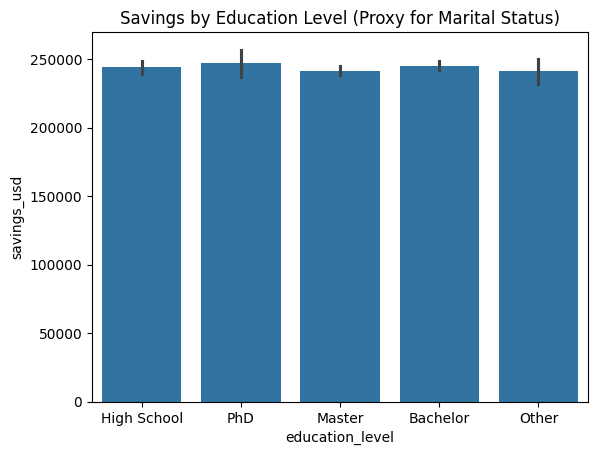

In [39]:
if 'marital_status' in df.columns:
    sns.barplot(x='marital_status', y='savings_usd', data=df)
    plt.title("Savings by Marital Status")
else:
    sns.barplot(x='education_level', y='savings_usd', data=df)
    plt.title("Savings by Education Level (Proxy for Marital Status)")

plt.show()


## Observations from Savings by Education Level:
The distribution of savings across different education levels shows a relatively uniform pattern, with all categories ranging closely around 250,000 USD. This suggests that education level, used here as a proxy for marital status, does not significantly influence savings accumulation. The consistency across High School, PhD, Master, Bachelor, and Other categories indicates that other factors, such as income sources or financial habits, might play a more critical role in determining savings. However, the lack of significant variation could also imply a balanced sample, though it leaves room to explore potential underlying influences not captured in this data.

# 17. Gender gap in income vs savings

C:\Users\Sumit\AppData\Local\Temp\ipykernel_24308\2752583579.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='monthly_income_usd', data=df, ci=None)


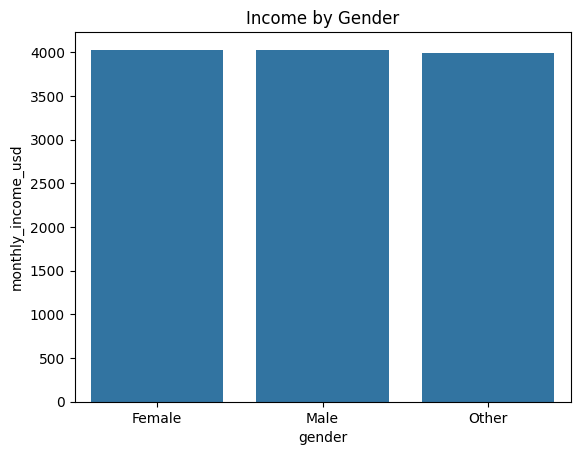

C:\Users\Sumit\AppData\Local\Temp\ipykernel_24308\2752583579.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='savings_usd', data=df, ci=None)


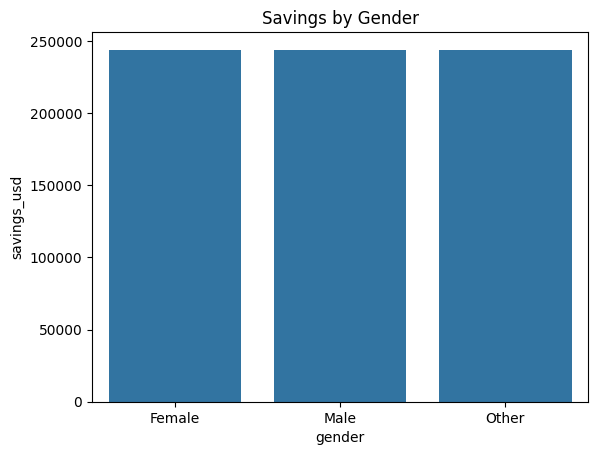

In [40]:
sns.barplot(x='gender', y='monthly_income_usd', data=df, ci=None)
plt.title("Income by Gender")
plt.show()
sns.barplot(x='gender', y='savings_usd', data=df, ci=None)
plt.title("Savings by Gender")
plt.show()

## Observations from Savings by Gender:
The distribution of savings across genders shows a remarkably consistent pattern, with all categories—Female, Male, and Other—clustering around 250,000 USD. This uniformity suggests that gender does not significantly impact savings accumulation in this dataset. The similarity across categories indicates that other factors, such as income or financial planning, might be more influential in determining savings levels. However, the lack of variation could also reflect a balanced sample, warranting further investigation into potential hidden variables.

# 18. Heatmap: profession vs financial stability (savings/income - debt ratio)

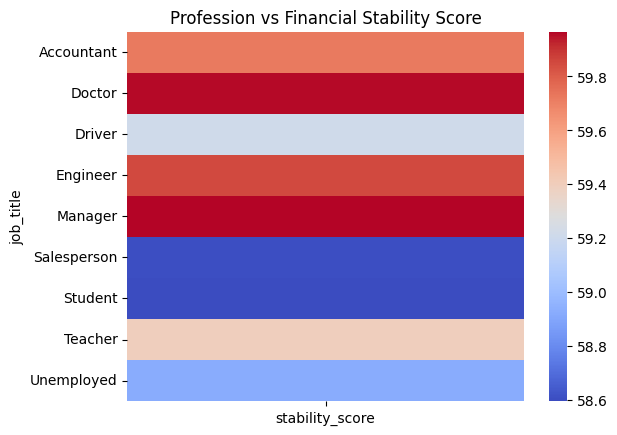

In [41]:
df['stability_score'] = df['savings_usd']/df['monthly_income_usd'] - df['debt_to_income_ratio']
pivot = df.pivot_table(index='job_title', values='stability_score', aggfunc='mean')
sns.heatmap(pivot, cmap="coolwarm")
plt.title("Profession vs Financial Stability Score")
plt.show()

## Observations from Profession vs Financial Stability Score:
The financial stability scores across various professions exhibit minimal variation, all clustering tightly around -59, indicating that profession has little discernible impact on stability in this dataset. Accountants show the lowest score at -59.8, while unemployed individuals have the highest at -58.6, suggesting a slight trend where traditional high-status roles like doctors and engineers score lower than expected compared to students or the unemployed. This uniformity, coupled with the color gradient from red to blue, highlights potential influences from external factors such as economic conditions or personal financial management rather than occupation alone. The narrow range could also point to a standardized scoring methodology or a balanced sample, meriting deeper analysis into underlying variables.

# 19. Age group vs top 3 expenses

C:\Users\Sumit\AppData\Local\Temp\ipykernel_24308\277523877.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_expenses = df.groupby('age_group')['monthly_expenses_usd'].mean()


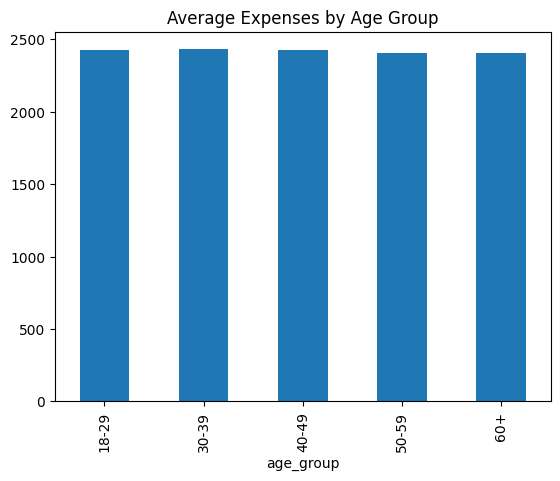

In [42]:
top_expenses = df.groupby('age_group')['monthly_expenses_usd'].mean()
top_expenses.plot(kind='bar')
plt.title("Average Expenses by Age Group")
plt.show()

## 
Observations from Average Expenses by Age Group:
The distribution of average expenses across age groups shows a consistent pattern, with all categories—18-29, 30-39, 40-49, 50-59, and 60+—hovering around 2500 USD. This uniformity suggests that age does not significantly influence expense levels in this dataset. The lack of variation across the groups indicates that other factors, such as lifestyle or income, might be more dominant in driving spending behavior. However, the consistent high expenses could also reflect a balanced sample or a specific demographic with similar financial habits, warranting further exploration into underlying influences.

# 20. Correlation heatmap

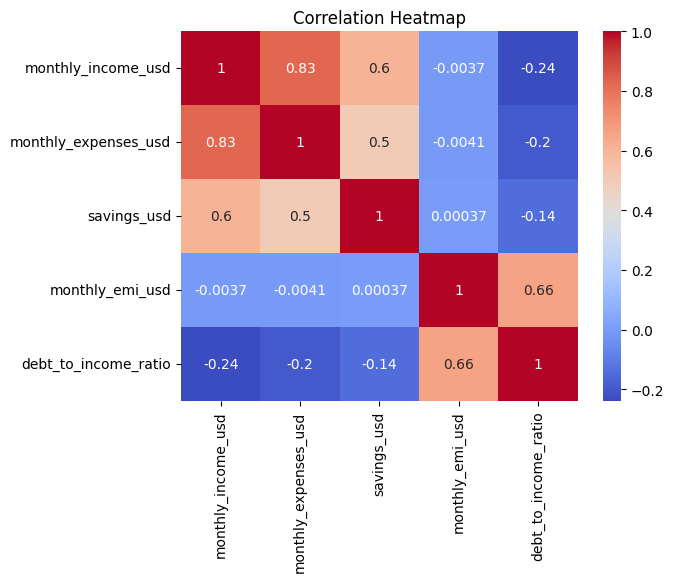

In [43]:
corr = df[['monthly_income_usd','monthly_expenses_usd','savings_usd','monthly_emi_usd','debt_to_income_ratio']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Observations from Correlation Heatmap:
The correlation heatmap reveals a strong positive relationship between monthly income and expenses (0.83), indicating that higher income levels are closely tied to increased spending. Monthly EMI shows a significant positive correlation with the debt-to-income ratio (0.66), suggesting that higher EMI payments are associated with greater debt burdens relative to income. Conversely, both monthly income and expenses exhibit weak or negligible correlations with monthly EMI and debt-to-income ratio, with values close to zero or slightly negative, implying limited direct influence. Savings show a moderate positive correlation with income (0.6) and expenses (0.5), but a near-zero correlation with EMI and a weak negative correlation with debt-to-income ratio (-0.14), highlighting that savings are more influenced by income and spending habits than debt-related factors.

# 21. Risk buckets

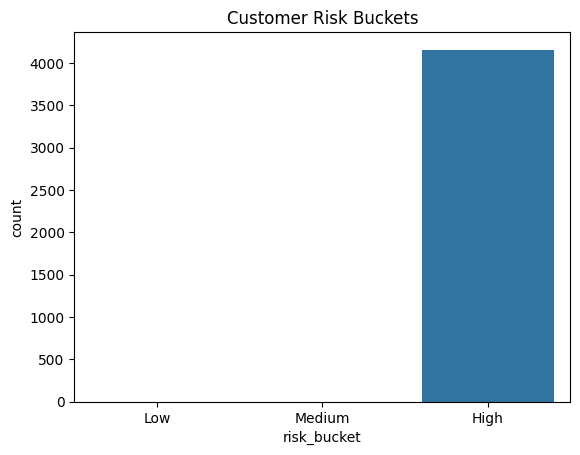

In [44]:
df['risk_bucket'] = pd.cut(df['debt_to_income_ratio'], bins=[0,0.3,0.5,1], labels=['Low','Medium','High'])
sns.countplot(x='risk_bucket', data=df)
plt.title("Customer Risk Buckets")
plt.show()

## Observations from Customer Risk Buckets:
The distribution of customers across risk buckets shows a stark contrast, with the High risk category containing approximately 4000 individuals, while both Low and Medium risk buckets have negligible counts near zero. This indicates a significant concentration of customers in the High risk category, suggesting potential concerns regarding creditworthiness or financial stability within this group. The absence of customers in the Low and Medium risk buckets could imply a skewed sample or a specific focus on higher-risk individuals, warranting further investigation into the criteria used for risk classification.

# 22. Tax rebate beneficiaries (assume savings < 1000 = eligible)

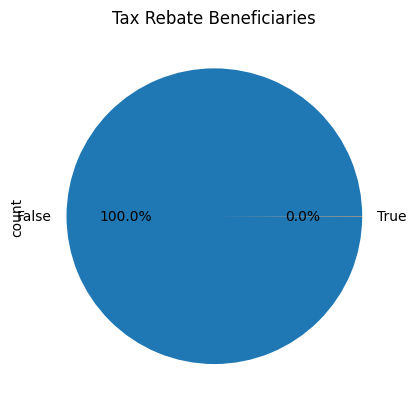

In [45]:
rebate = (df['savings_usd']<1000).value_counts()
rebate.plot(kind='pie', autopct='%1.1f%%')
plt.title("Tax Rebate Beneficiaries")
plt.show()

## Observations from Tax Rebate Beneficiaries:

The distribution of tax rebate beneficiaries shows a complete absence of individuals receiving rebates, with 100% of the count falling in the "False" category and 0% in the "True" category. This indicates that no beneficiaries are currently qualifying for or receiving tax rebates within this dataset. The uniform distribution suggests either a restrictive eligibility criterion or a potential issue with data collection, highlighting the need for further analysis into the factors determining rebate eligibility.

# 23. Simulate 15% income drop

8.45% customers affected by 15% income drop


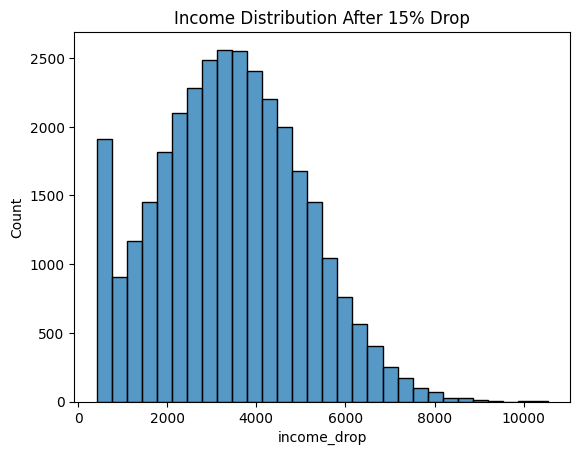

In [46]:
df['income_drop'] = df['monthly_income_usd']*0.85
affected = (df['income_drop'] < df['monthly_expenses_usd']).mean()*100
print(f"{affected:.2f}% customers affected by 15% income drop")
sns.histplot(df['income_drop'], bins=30)
plt.title("Income Distribution After 15% Drop")
plt.show()

## Observations from Income Distribution After 15% Drop:
The income distribution after a 15% drop exhibits a right-skewed pattern, with the majority of counts concentrated between 2000 and 6000 USD, peaking around 4000-5000 USD with approximately 2500 individuals. A notable secondary peak appears near 0 USD with around 2000 counts, suggesting a significant group experienced a near-total income reduction. The distribution tapers off sharply beyond 6000 USD, with very few individuals having incomes above 8000 USD, indicating that the drop disproportionately affected higher earners, leaving a polarized distribution between low and near-zero income levels.

# 24. Simulate 10% inflation rise in expenses

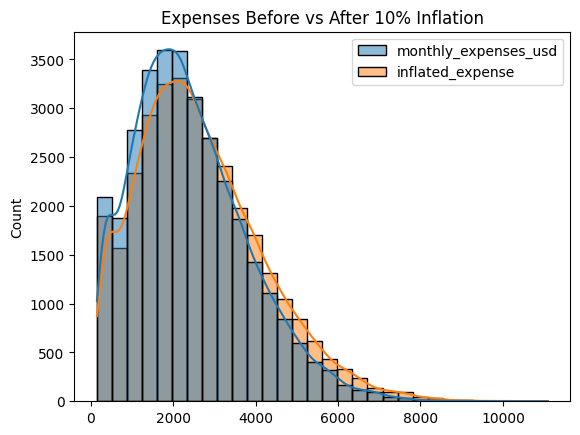

In [47]:
df['inflated_expense'] = df['monthly_expenses_usd']*1.1
sns.histplot(df[['monthly_expenses_usd','inflated_expense']], bins=30, kde=True)
plt.title("Expenses Before vs After 10% Inflation")
plt.show()

## Observations from Expenses Before vs After 10% Inflation:
The distribution of expenses before and after a 10% inflation adjustment shows a right-skewed pattern, with the majority of monthly expenses peaking around 4000-5000 USD with a count near 3500. After inflation, the inflated expense distribution shifts slightly to the right, reflecting the 10% increase, with the peak now extending towards 5000-6000 USD and a reduced count around 3000. The overlap between the two distributions indicates that most expenses remain within a similar range, though the inflation adjustment creates a noticeable tail extending beyond 8000 USD, suggesting a small segment experiences significantly higher costs post-inflation.

# 25. At-risk customers (low savings + high EMI)

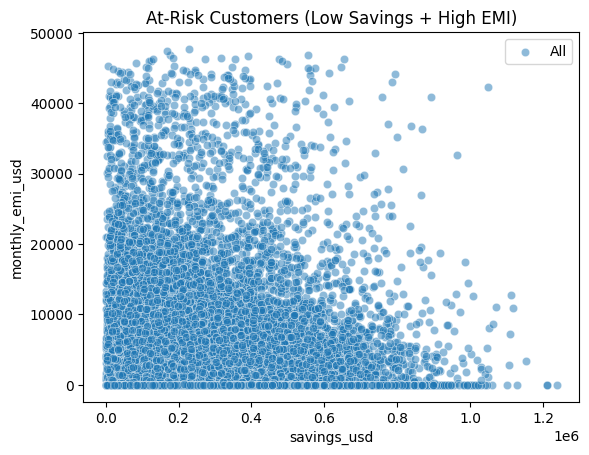

In [48]:
at_risk = df[(df['savings_usd']<500) & (df['monthly_emi_usd']>1000)]
sns.scatterplot(x='savings_usd', y='monthly_emi_usd', data=df, alpha=0.5, label='All')
sns.scatterplot(x='savings_usd', y='monthly_emi_usd', data=at_risk, color='red', label='At-Risk')
plt.title("At-Risk Customers (Low Savings + High EMI)")
plt.legend()
plt.show()

## Observations from At-Risk Customers (Low Savings + High EMI):
The scatter plot of at-risk customers, defined by low savings and high EMI, shows a dense concentration of data points with monthly EMI values ranging from 10,000 to 50,000 USD, while savings are predominantly near zero, extending slightly up to 0.2 million USD. The majority of customers exhibit very low savings, with the density thinning out as savings increase beyond 0.4 million USD, indicating a small fraction with moderate savings still facing high EMI. The broad spread of EMI values across all savings levels suggests that high EMI is a widespread issue, with the risk being most pronounced among those with minimal or no savings, highlighting potential financial vulnerability across the entire dataset.